In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [93]:
df_youtube_videos=pd.read_csv("youtube_videos.tsv",sep="\t")
df_youtube_videos.head(5)

,id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url
0,uDNj-_5ty48,267,373,274,568,320,29.97,0.00,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
1,uDNj-_5ty48,267,512,396,480,270,29.97,29.97,h264,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
2,uDNj-_5ty48,267,324,263,400,226,29.97,29.97,flv1,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
3,uDNj-_5ty48,267,85,55,176,144,12.00,12.00,mpeg4,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...
4,WCgt-AactyY,31,1261,1183,640,480,24.00,0.00,h264,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...


In [94]:
df_transcoding_mesurment=pd.read_csv("transcoding_mesurment.tsv",sep="\t")
df_transcoding_mesurment.head(5)


,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [95]:
print(df_transcoding_mesurment.columns)
len(df_transcoding_mesurment.columns)

Index(['id', 'duration', 'codec', 'width', 'height', 'bitrate', 'framerate',
       'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size', 'size',
       'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'umem',
       'utime'],
      dtype='object')


22

In [96]:
print(df_youtube_videos.columns)
len(df_youtube_videos.columns)

Index(['id', 'duration', 'bitrate', 'bitrate(video)', 'height', 'width',
       'frame rate', 'frame rate(est.)', 'codec', 'category', 'url'],
      dtype='object')


11

In [97]:
print(df_transcoding_mesurment.columns)
len(df_transcoding_mesurment.columns)


Index(['id', 'duration', 'codec', 'width', 'height', 'bitrate', 'framerate',
       'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size', 'size',
       'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'umem',
       'utime'],
      dtype='object')


22

In [98]:
empty = []
for i in range(len(df_youtube_videos.columns)):
    if df_youtube_videos[df_youtube_videos.columns[i]].isnull().values.all():
        empty.append(df_youtube_videos.columns[i])
        print("tomate")
print(empty)
df_youtube_videos = df_youtube_videos.drop(columns=empty)

[]


In [99]:
empty = []
for i in range(len(df_transcoding_mesurment.columns)):
    if df_transcoding_mesurment[df_transcoding_mesurment.columns[i]].isnull().values.all():
        empty.append(df_transcoding_mesurment.columns[i])
        print("tomate")

print(empty)
df_transcoding_mesurment = df_transcoding_mesurment.drop(columns=empty)

[]


In [100]:
df_youtube_videos.set_axis(['id_video','duration', 'bitrate', 'bitrate(video)', 'height_video', 'width_video','framerate', 'framerate(est.)', 'codec', 'category_video', 'url'],axis='columns',inplace=True)
df_transcoding_mesurment.set_axis(['id_video', 'duration', 'codec', 'width_video', 'height_video', 'bitrate', 'framerate','number_i_frames', 'number_p_frames', 'number_b_frames', 'total_frames', 'i_size', 'p_size', 'b_size', 'total_size',      'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'codec_allocated_memory', 'transcoding_time'], axis = 'columns',inplace =True)

In [101]:
df_youtube_videos.describe()


,duration,bitrate,bitrate(video),height_video,width_video,framerate,framerate(est.)
count,168286.000000,168286.00000,168286.000000,168286.000000,168286.000000,168286.000000,168286.000000
mean,271.654184,730.62149,624.363025,561.018706,368.399701,24.564592,19.884441
std,552.881871,919.15473,860.955654,359.071569,201.274180,7.396615,11.435070
min,1.000000,0.00000,0.000000,100.000000,88.000000,0.000000,0.000000
25%,55.000000,289.00000,231.000000,320.000000,240.000000,23.980000,12.000000
50%,145.000000,459.00000,349.000000,480.000000,360.000000,29.920000,25.000000
75%,289.000000,826.00000,640.000000,640.000000,480.000000,29.970000,29.970000
max,25845.000000,22421.00000,22229.000000,2592.000000,1944.000000,59.940000,30.020000


In [102]:
df_transcoding_mesurment.describe()

,duration,width_video,height_video,bitrate,framerate,number_i_frames,number_p_frames,number_b_frames,total_frames,i_size,p_size,b_size,total_size,o_bitrate,o_framerate,o_width,o_height,codec_allocated_memory,transcoding_time
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


In [103]:
# df_transcoding_mesurment['bitrate'].hist()
# q = df_transcoding_mesurment['bitrate'].quantile(0.95)
# q
# df_95 = df_transcoding_mesurment[df_transcoding_mesurment['bitrate'] < q]
# df_95


In [104]:
# select any line with at least one empty cell 
df_transcoding_mesurment[pd.isnull(df_transcoding_mesurment).any(axis=1)]


,id_video,duration,codec,width_video,height_video,bitrate,framerate,number_i_frames,number_p_frames,number_b_frames,...,p_size,b_size,total_size,o_codec,o_bitrate,o_framerate,o_width,o_height,codec_allocated_memory,transcoding_time


In [105]:
df_transcoding_mesurment

,id_video,duration,codec,width_video,height_video,bitrate,framerate,number_i_frames,number_p_frames,number_b_frames,...,p_size,b_size,total_size,o_codec,o_bitrate,o_framerate,o_width,o_height,codec_allocated_memory,transcoding_time
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,1280,720,58528,3.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,ZWEN-71BqPs,972.27100,h264,480,360,278822,29.000000,560,28580,0,...,26561730,0,33886358,flv,242000,24.00,640,480,88692,1.552
68780,zWQN-bqqg0o,129.88100,vp8,640,480,639331,30.162790,36,3855,0,...,9503846,0,10379630,mpeg4,539000,29.97,1920,1080,107524,18.557
68781,zX17-vi0sqQ,249.68000,vp8,320,240,359345,25.068274,129,6113,0,...,9456514,0,11215178,flv,539000,12.00,176,144,88708,0.752
68782,zyiT-TzxIpk,183.62334,h264,1280,720,2847539,29.000000,98,5405,0,...,60113035,0,65359329,mpeg4,539000,12.00,320,240,88724,5.444


<AxesSubplot:>

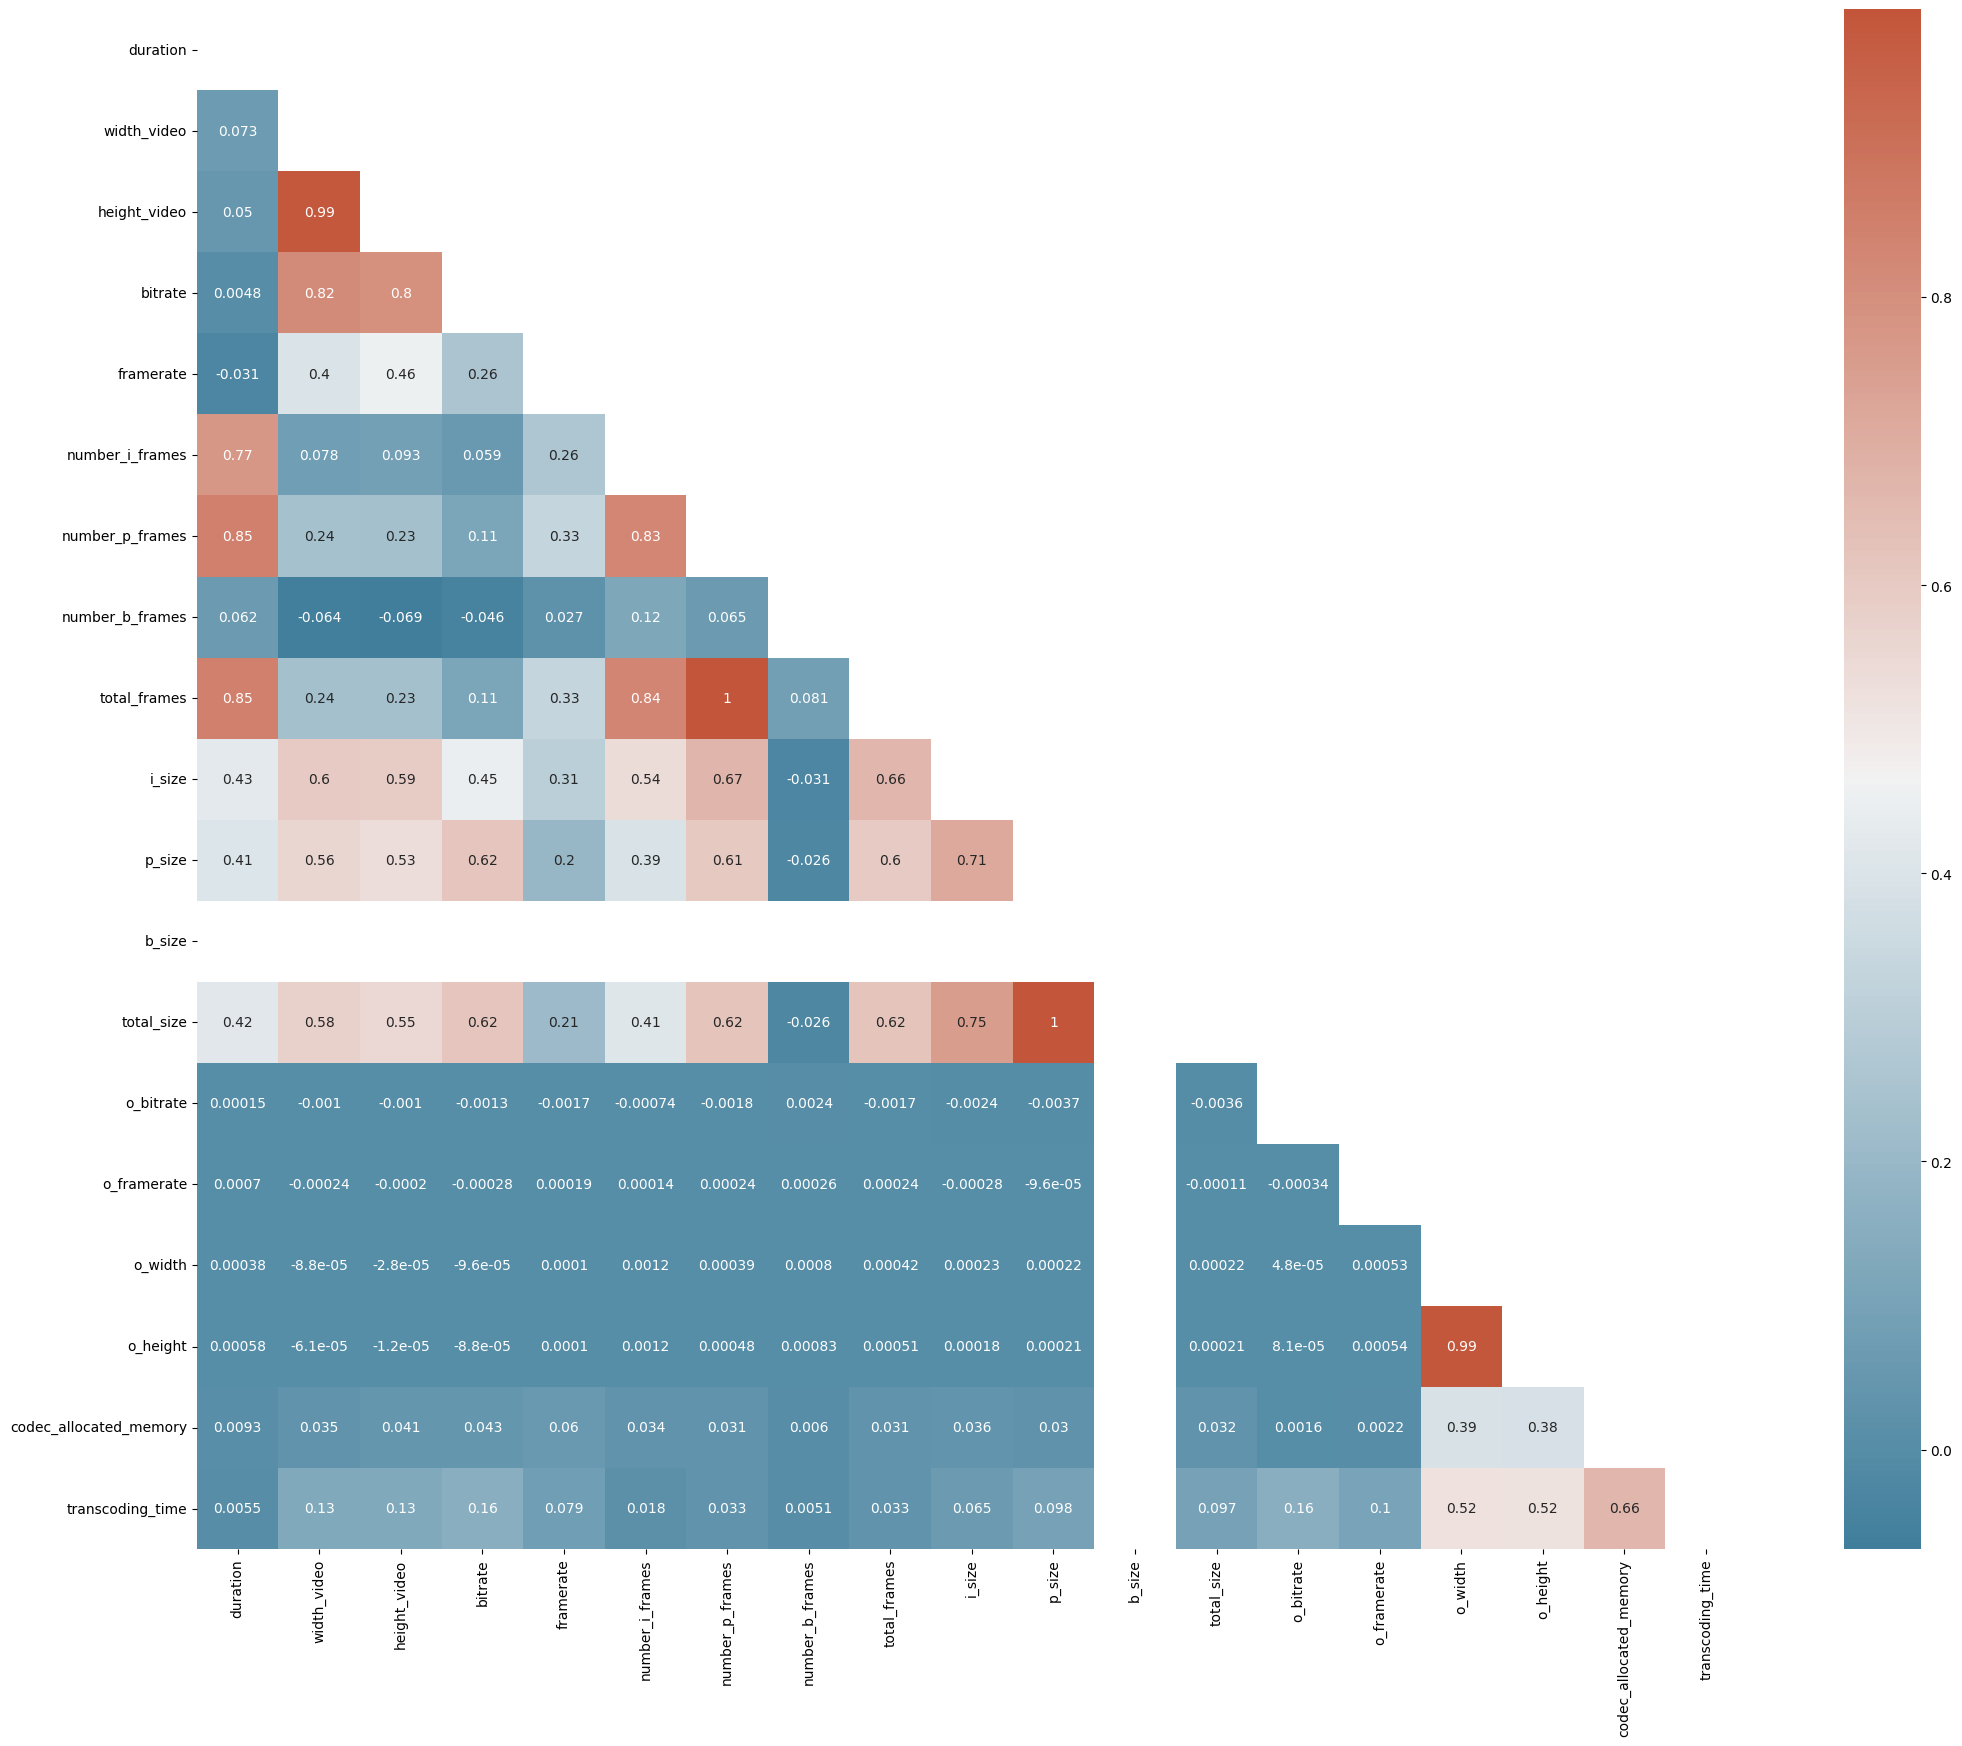

In [106]:
corr = df_transcoding_mesurment.corr()
# corr.plot()
# corr.style.background_gradient(cmap='coolwarm')


#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(25, 20))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [107]:
df_categorie=pd.DataFrame(df_transcoding_mesurment,columns=['codec'])
temp=df_transcoding_mesurment.groupby('codec').size()

fig=px.bar(temp,
           x=temp.index,
           y=temp, 
           range_x = [0,6],color=temp.index,
           title="Number of Video per type of codec")

fig.update_layout(xaxis_title="codec", yaxis_title="Number of Video", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=20, uniformtext_mode='hide')

fig.show()

In [108]:
df_categorie=pd.DataFrame(df_transcoding_mesurment,columns=['o_codec'])
temp=df_transcoding_mesurment.groupby('o_codec').size()

fig=px.bar(temp,
           x=temp.index,
           y=temp, 
           range_x = [0,16],color=temp.index,
           title="Number of Video per type of codec after transcoding")

fig.update_layout(xaxis_title="codec", yaxis_title="Number of Video", 
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=20, uniformtext_mode='hide')

fig.show()

In [109]:
df_youtube_videos = pd.get_dummies(df_youtube_videos, columns=['codec'])
df_youtube_videos


,id_video,duration,bitrate,bitrate(video),height_video,width_video,framerate,framerate(est.),category_video,url,codec_flv1,codec_h264,codec_mpeg4,codec_none,codec_vp8
0,uDNj-_5ty48,267,373,274,568,320,29.97,0.00,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...,0,1,0,0,0
1,uDNj-_5ty48,267,512,396,480,270,29.97,29.97,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...,0,1,0,0,0
2,uDNj-_5ty48,267,324,263,400,226,29.97,29.97,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...,1,0,0,0,0
3,uDNj-_5ty48,267,85,55,176,144,12.00,12.00,Music,http://r2---sn-ovgq0oxu-5goe.c.youtube.com/vid...,0,0,1,0,0
4,WCgt-AactyY,31,1261,1183,640,480,24.00,0.00,People & Blogs,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168281,ehHw-P9S4lU,68,816,560,480,360,29.97,29.97,Music,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...,0,0,0,0,1
168282,ehHw-P9S4lU,68,340,273,320,240,29.97,29.97,Music,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...,1,0,0,0,0
168283,ehHw-P9S4lU,68,81,55,176,144,12.00,12.00,Music,http://r1---sn-ovgq0oxu-5goe.c.youtube.com/vid...,0,0,1,0,0
168284,MzjT-56gXno,285,1290,1181,854,480,29.97,0.00,Sports,http://r4---sn-ovgq0oxu-5goe.c.youtube.com/vid...,0,1,0,0,0


In [110]:
# df_transcoding_mesurment = pd.get_dummies(df_transcoding_mesurment, columns=['codec'])
df_transcoding_mesurment
# df_transcoding_mesurment = pd.get_dummies(df_transcoding_mesurment, columns=['o_codec'])
df_transcoding_mesurment

,id_video,duration,codec,width_video,height_video,bitrate,framerate,number_i_frames,number_p_frames,number_b_frames,...,p_size,b_size,total_size,o_codec,o_bitrate,o_framerate,o_width,o_height,codec_allocated_memory,transcoding_time
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.000000,27,1537,0,...,825054,0,889537,mpeg4,56000,12.00,1280,720,58528,3.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68779,ZWEN-71BqPs,972.27100,h264,480,360,278822,29.000000,560,28580,0,...,26561730,0,33886358,flv,242000,24.00,640,480,88692,1.552
68780,zWQN-bqqg0o,129.88100,vp8,640,480,639331,30.162790,36,3855,0,...,9503846,0,10379630,mpeg4,539000,29.97,1920,1080,107524,18.557
68781,zX17-vi0sqQ,249.68000,vp8,320,240,359345,25.068274,129,6113,0,...,9456514,0,11215178,flv,539000,12.00,176,144,88708,0.752
68782,zyiT-TzxIpk,183.62334,h264,1280,720,2847539,29.000000,98,5405,0,...,60113035,0,65359329,mpeg4,539000,12.00,320,240,88724,5.444


<AxesSubplot:>

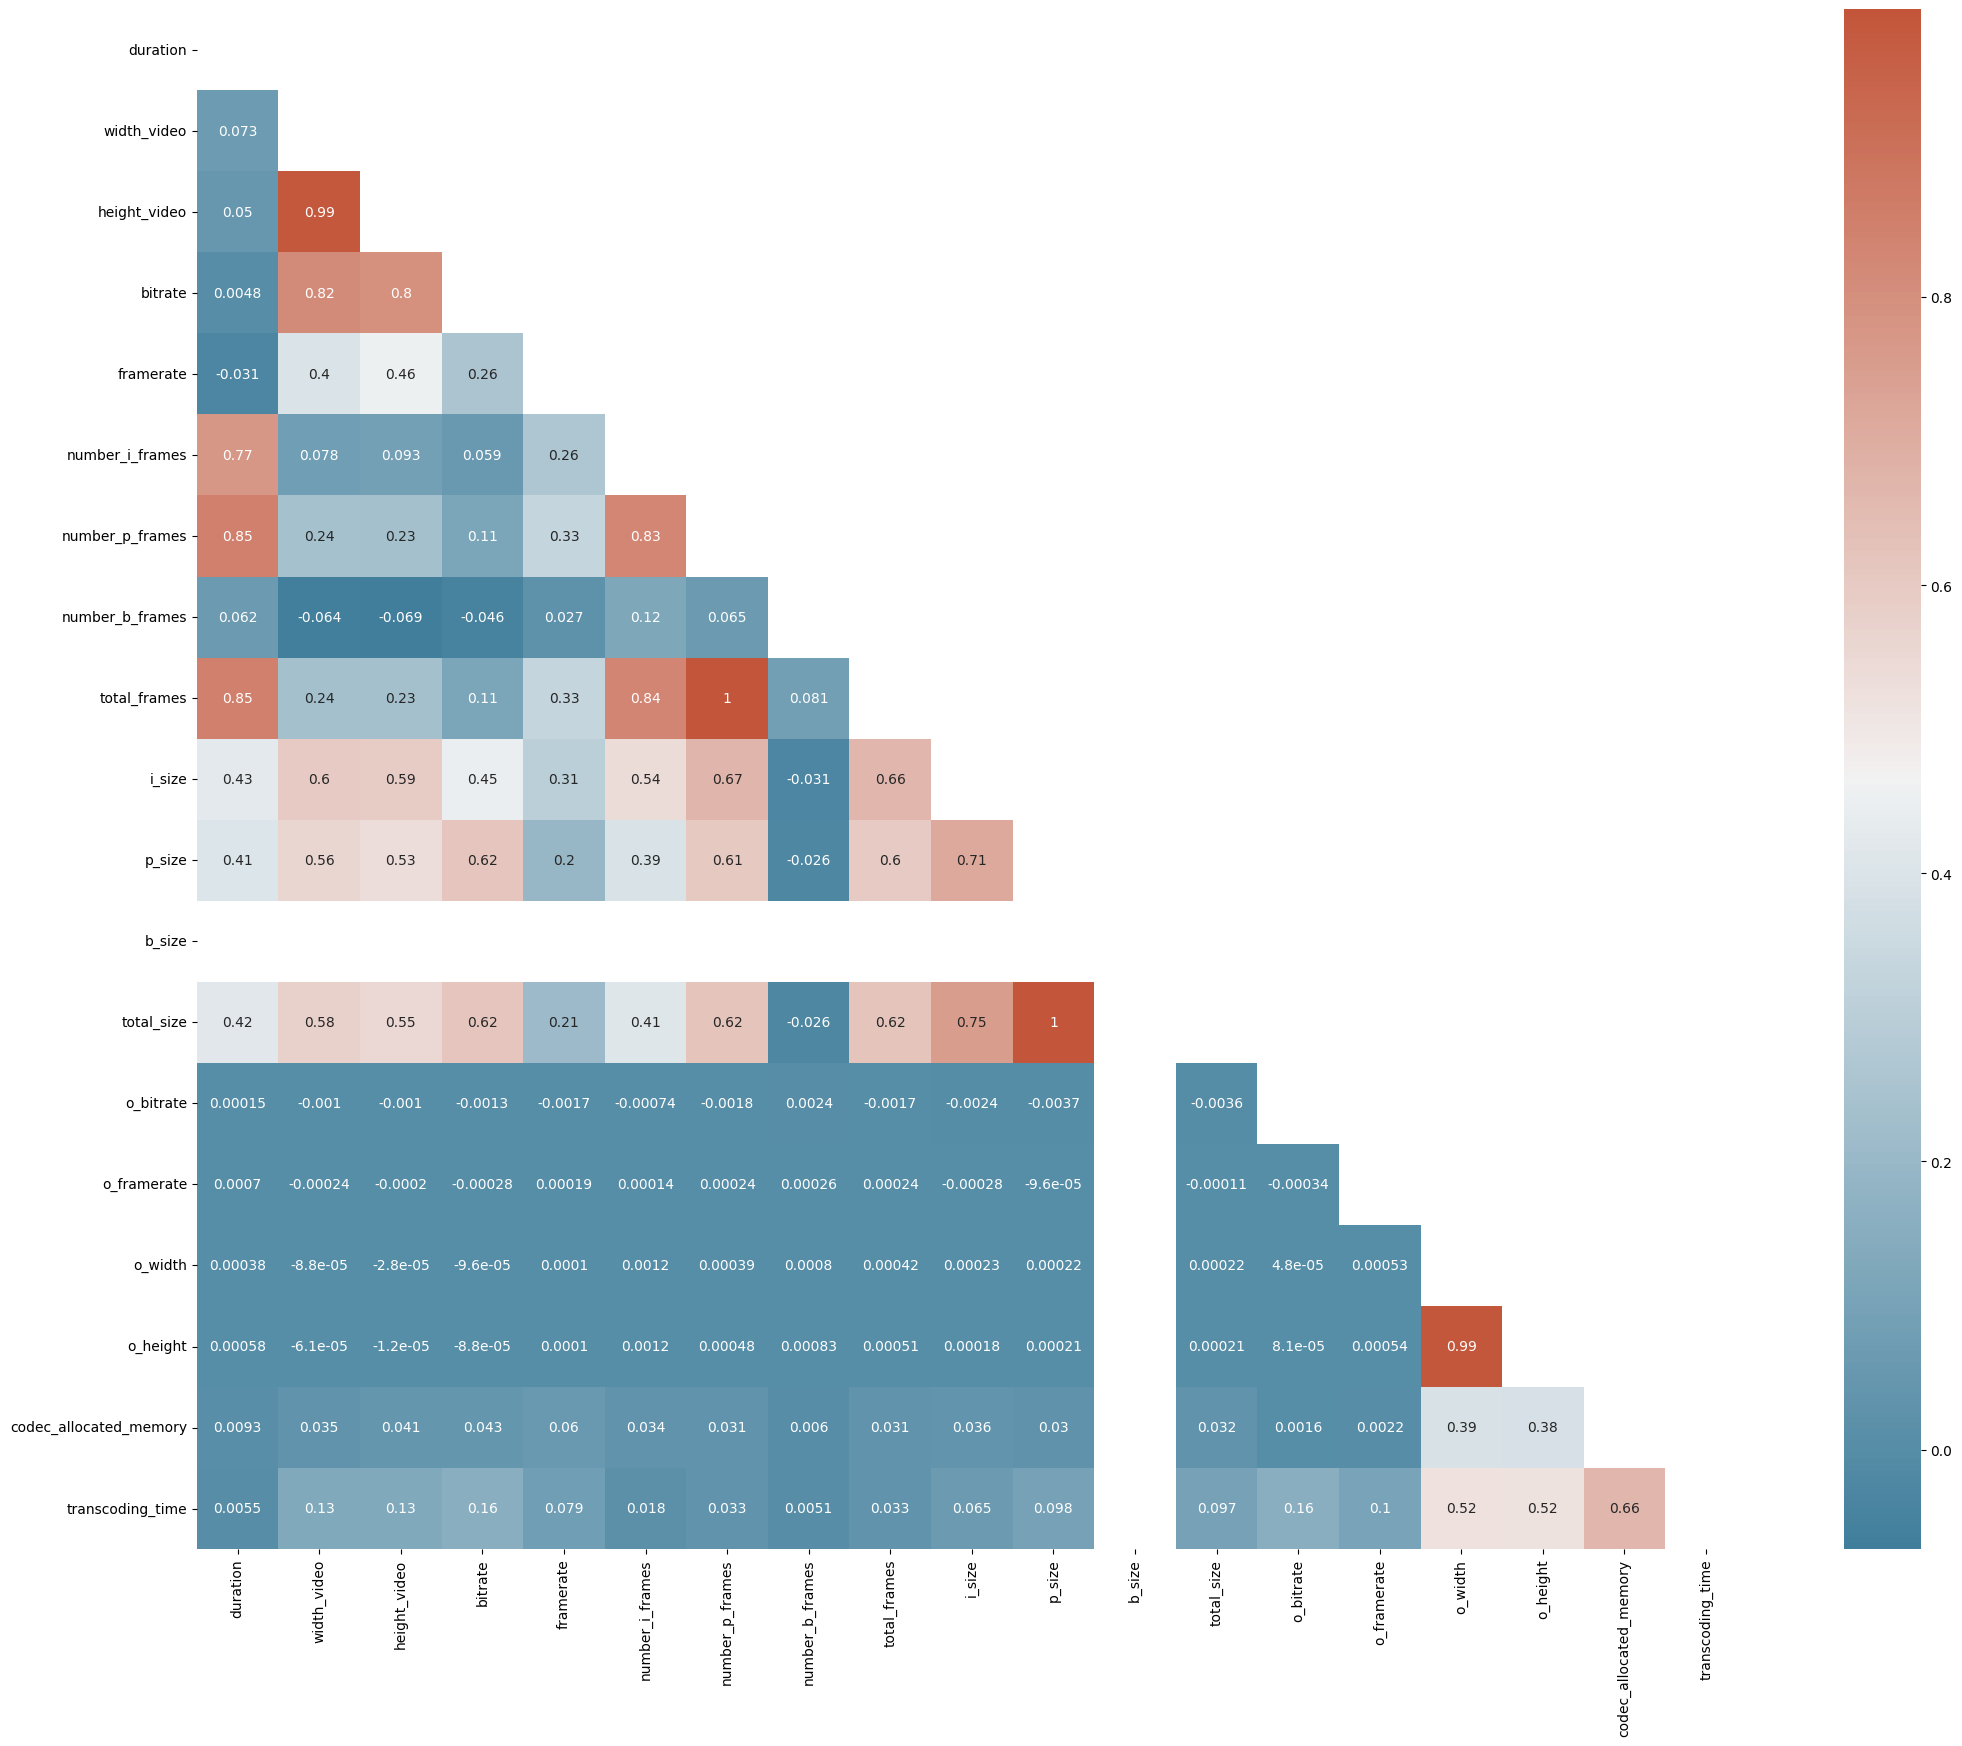

In [111]:
corr = df_transcoding_mesurment.corr()
# corr.plot()
# corr.style.background_gradient(cmap='coolwarm')


#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(25, 20))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

<AxesSubplot:ylabel='Frequency'>

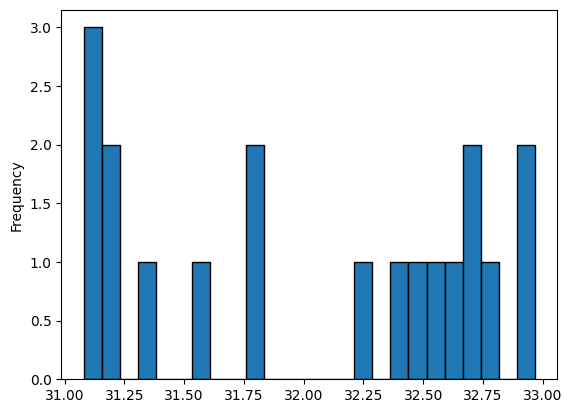

In [112]:



q = df_transcoding_mesurment["duration"].quantile(0.01)

df_95 = df_transcoding_mesurment[df_transcoding_mesurment["duration"] < q]
df_95["duration"].plot.hist(bins=25 ,edgecolor='black')